In [45]:
import cv2 as cv
import numpy as np
import  matplotlib.pyplot as plt

In [46]:
img_test = cv.imread('datasets/normal/nodefect(1).bmp')
img_test

array([[[ 18,  18,  18],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 18,  18,  18],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 18,  18,  18],
        [ 19,  19,  19],
        [ 22,  22,  22],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[221, 221, 221],
        [232, 232, 232],
        [243, 243, 243],
        ...,
        [214, 214, 214],
        [198, 198, 198],
        [188, 188, 188]],

       [[215, 215, 215],
        [227, 227, 227],
        [245, 245, 245],
        ...,
        [207, 207, 207],
        [198, 198, 198],
        [188, 188, 188]],

       [[226, 226, 226],
        [221, 221, 221],
        [247, 247, 247],
        ...,
        [211, 211, 211],
        [196, 196, 196],
        [188, 188, 188]]

In [47]:
img_test.shape

(1544, 1296, 3)

In [48]:
img_test.size

6003072

In [49]:
img_test.dtype

dtype('uint8')

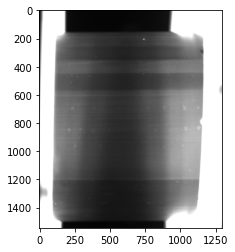

In [50]:
plt.imshow(img_test)

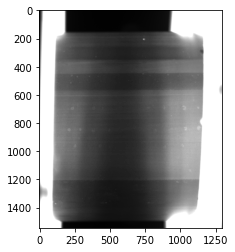

In [51]:
# img_test_gray = cv.cvtColor(img_test, cv.COLOR_RGB2GRAY)
# plt.imshow(img_test_gray)
img_test_gray = cv.imread('datasets/normal/nodefect(1).bmp', cv.IMREAD_GRAYSCALE)
# img_test_gray = cv.imread('datasets/unnormal/defection(19).bmp', cv.IMREAD_GRAYSCALE)
# cv.imshow('img_test_gray', img_test_gray)
# cv.waitKey()
plt.imshow(img_test_gray, cmap='gray')

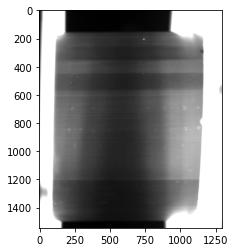

In [52]:
img_test_gray_blur = cv.GaussianBlur(img_test_gray, (3, 3), 0)
plt.imshow(img_test_gray_blur, cmap='gray')
# cv.imshow('img_test_gray_blur', img_test_gray_blur)
# cv.waitKey()

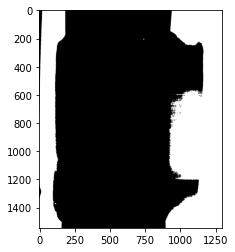

In [53]:
_, img_test_thres_otsu = cv.threshold(img_test_gray_blur, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(img_test_thres_otsu, cmap='gray')

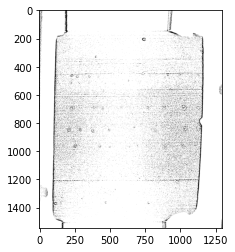

In [54]:
img_test_thres = cv.adaptiveThreshold(img_test_gray_blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11, 2)

plt.imshow(img_test_thres, cmap='gray')

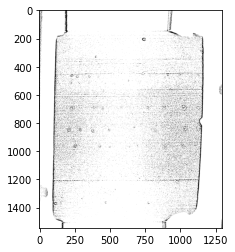

In [56]:
_, img_test_thres_otsu_1 = cv.threshold(img_test_thres, 127, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(img_test_thres_otsu_1, cmap='gray')


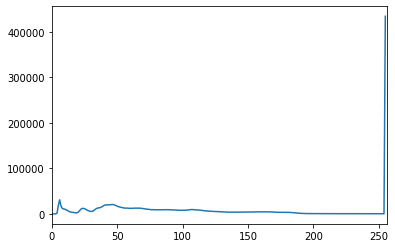

In [59]:
img_hist = cv.calcHist([img_test_gray],[0],None,[256],[0,256])
plt.plot(img_hist)
plt.xlim([0,256])
# plt.hist(img_test_gray.ravel(),256,[0,256])
plt.show()

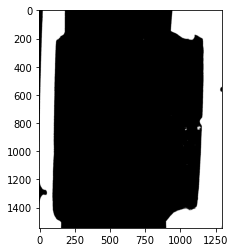

In [61]:
# 个人想法感觉可以先做一个简单的平滑去除一些小噪点，然后再做二值化
_, img_test_thres_all_black = cv.threshold(img_test_gray, 200, 255, cv.THRESH_BINARY)
plt.imshow(img_test_thres_all_black, cmap='gray')
